#  Exploratory Data Analysis (EDA) and Visualization using D3.js

This notebook focusses on the following activities:
1. Detailed EDA analysis
2. Advanced visualizations using D3.js

The dataset we are using here is of Bangalore Zomato sales Restaurants

## Exploratory Data Analysis:

### * Loading the Dataset and Basic Overview*

**Procedure:**

1. Unzip the provided dataset.
2. Load the dataset using pandas.
3. Display the first few rows to understand its structure.
4. Get the datatype of each column.
5. Check for any missing values.

In [1]:
import pandas as pd
import os

In [2]:
import pandas as pd
import zipfile

# Unzipping the dataset
with zipfile.ZipFile('C:/Users/patil/Downloads/zomato.csv (1).zip','r') as z:
    z.extractall('')

# Loading the dataset into a pandas dataframe
zomato_df = pd.read_csv('zomato.csv')

# Displaying the first few rows of the dataset
zomato_df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
# Displaying data types for each column
column_data_types = zomato_df.dtypes

# Checking for missing values in the dataset
missing_values = zomato_df.isnull().sum()

column_data_types, missing_values


(url                            object
 address                        object
 name                           object
 online_order                   object
 book_table                     object
 rate                           object
 votes                           int64
 phone                          object
 location                       object
 rest_type                      object
 dish_liked                     object
 cuisines                       object
 approx_cost(for two people)    object
 reviews_list                   object
 menu_item                      object
 listed_in(type)                object
 listed_in(city)                object
 dtype: object,
 url                                0
 address                            0
 name                               0
 online_order                       0
 book_table                         0
 rate                            7775
 votes                              0
 phone                           1208
 location        

**Column Data Types:**

Most of the columns are of object data type which usually indicates string or categorical data.
The votes column is of int64 data type, representing integer values.
Missing Values:

* rate: 7775 missing values.
* phone: 1208 missing values.
* location: 21 missing values.
* rest_type: 227 missing values.
* dish_liked: 28078 missing values (this is quite significant).
* cuisines: 45 missing values.
* approx_cost(for two people): 346 missing values.

## *Handling missing values and Cleaning Data*

In [4]:

# Filling missing values with specified placeholders or methods
zomato_df['rate'].fillna('Not Rated', inplace=True)
zomato_df['phone'].fillna('Not Available', inplace=True)
zomato_df['location'].fillna('Not Specified', inplace=True)
zomato_df['rest_type'].fillna('Not Specified', inplace=True)
zomato_df['dish_liked'].fillna('Unknown', inplace=True)
zomato_df['cuisines'].fillna('Not Specified', inplace=True)

# Filling 'approx_cost(for two people)' with its median after converting it to numerical
zomato_df['approx_cost(for two people)'] = zomato_df['approx_cost(for two people)'].str.replace(',', '').astype(float)
median_cost = zomato_df['approx_cost(for two people)'].median()
zomato_df['approx_cost(for two people)'].fillna(median_cost, inplace=True)

# Checking if there are any missing values left
remaining_missing = zomato_df.isnull().sum()
remaining_missing


url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [5]:
# Extracting numerical rating from the 'rate' column and converting to float
zomato_df['rate'] = zomato_df['rate'].str.split('/', expand=True)[0]
zomato_df['rate'] = zomato_df['rate'].replace('Not Rated', 'NaN')
zomato_df['rate'].replace('NEW', 'NaN', inplace=True)
zomato_df['rate'].replace('-', 'NaN', inplace=True)
zomato_df['rate'] = zomato_df['rate'].astype(float)

# Converting 'online_order' and 'book_table' to boolean
zomato_df['online_order'] = zomato_df['online_order'].map({'Yes': 1, 'No': 0})
zomato_df['book_table'] = zomato_df['book_table'].map({'Yes': 1, 'No': 0})

# Checking the data types again
current_data_types = zomato_df.dtypes
current_data_types


url                             object
address                         object
name                            object
online_order                     int64
book_table                       int64
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [6]:
# Converting 'online_order' and 'book_table' to boolean
zomato_df['online_order'] = zomato_df['online_order'].astype(bool)
zomato_df['book_table'] = zomato_df['book_table'].astype(bool)

# Checking the data types again to confirm the changes
updated_data_types = zomato_df.dtypes
updated_data_types


url                             object
address                         object
name                            object
online_order                      bool
book_table                        bool
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

## *Exploratory Data Analysis and normal Visualizations*

Given the vastness of the dataset, we'll start with some basic visualizations:

1. Distribution of Ratings: Understand the distribution of ratings across all restaurants.
2. Online Orders: See the proportion of restaurants offering online ordering.
3. Bookings: Understand the proportion of restaurants that allow table reservations.
4. Top Cuisines: Identify the most popular cuisines offered by restaurants.
5. Cost Distribution: Visualize the distribution of the approximate cost for two people.

**Distribution of Ratings**

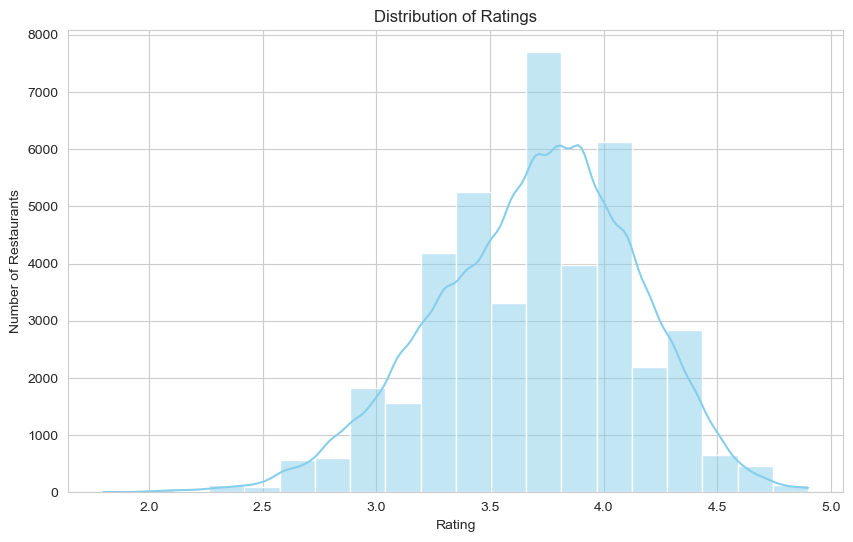

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(zomato_df['rate'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()


## **Online Orders**

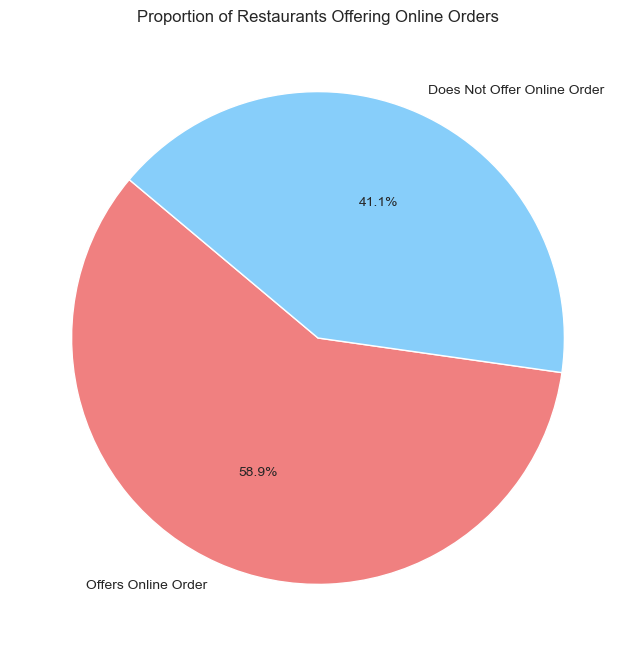

In [8]:
# Counting the number of restaurants offering online orders
online_order_counts = zomato_df['online_order'].value_counts()

# Adjusting the labels to match the boolean values in 'online_order' column
plt.figure(figsize=(8, 8))
plt.pie(online_order_counts, labels=['Offers Online Order', 'Does Not Offer Online Order'],
        colors=['lightcoral', 'lightskyblue'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Restaurants Offering Online Orders')
plt.show()

In [9]:
# Checking unique values in 'online_order' column
unique_online_order = zomato_df['online_order'].unique()
unique_online_order



array([ True, False])

## **Bookings**

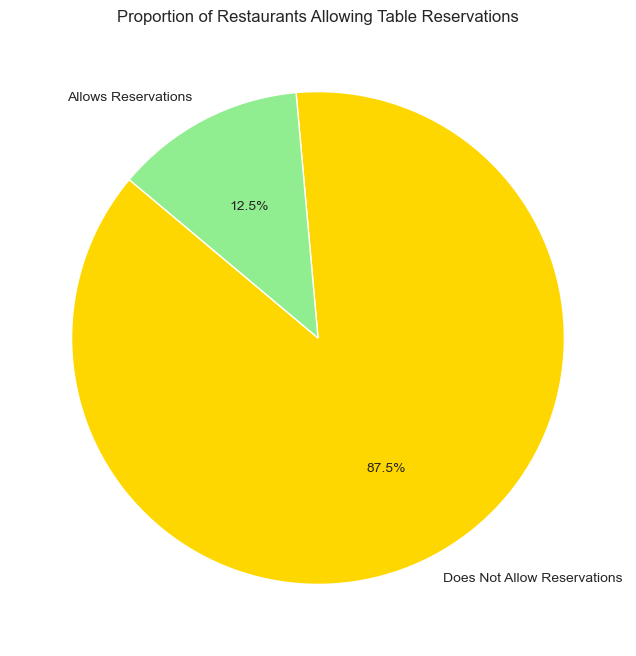

In [10]:
# Counting the number of restaurants allowing table reservations
book_table_counts = zomato_df['book_table'].value_counts()

# Plotting the pie chart for table reservations
plt.figure(figsize=(8, 8))
plt.pie(book_table_counts, labels=['Does Not Allow Reservations', 'Allows Reservations'],
        colors=['gold', 'lightgreen'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Restaurants Allowing Table Reservations')
plt.show()


## Top 10 Cuisines

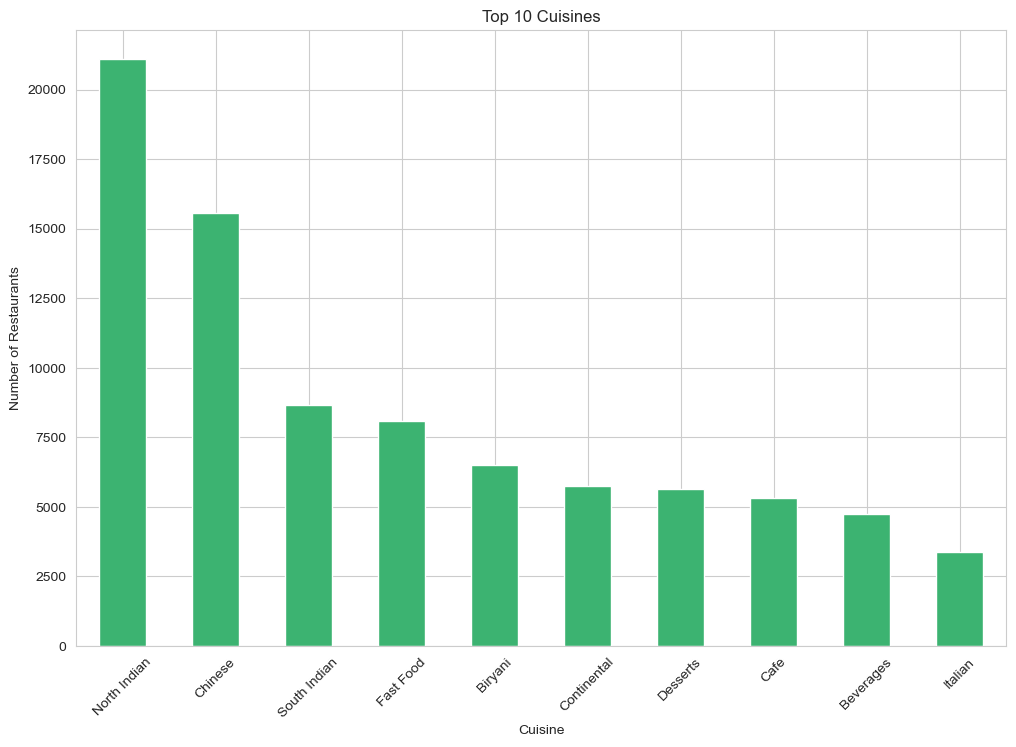

In [11]:
# Extracting cuisines and their counts
cuisines_series = zomato_df['cuisines'].str.split(',').explode()
cuisine_counts = cuisines_series.str.strip().value_counts()

# Taking the top 10 cuisines
top_10_cuisines = cuisine_counts.head(10)

# Plotting the top 10 cuisines
plt.figure(figsize=(12, 8))
top_10_cuisines.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


## Cost Estimation

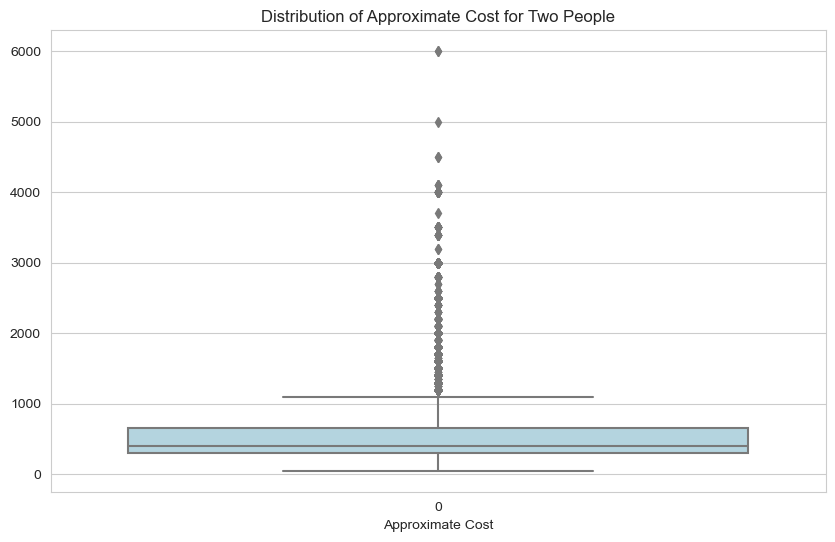

In [12]:
# Plotting the box plot for approximate cost for two people
plt.figure(figsize=(10, 6))
sns.boxplot(zomato_df['approx_cost(for two people)'], color='lightblue')
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approximate Cost')
plt.show()


## Correlation Analysis

**5.1 Correlation Analysis**

We'll begin by analyzing the correlations between numeric variables and visualizing them using a heatmap.

**5.2 Grouped Analysis**

We'll examine the average rating of restaurants based on:

* Whether they offer online ordering.
* Whether they allow table reservations.

**5.3 Comparative Analysis**

We'll compare ratings across:

* Different types of restaurants.
* Different locations.

In [13]:
# 5.1 Correlation Analysis
correlation_matrix = zomato_df[['rate', 'votes', 'online_order', 'book_table', 'approx_cost(for two people)']].corr()

# 5.2 Grouped Analysis
avg_rating_online_order = zomato_df.groupby('online_order')['rate'].mean()
avg_rating_book_table = zomato_df.groupby('book_table')['rate'].mean()

# 5.3 Comparative Analysis
# Taking top 10 types of restaurants and locations for better visualization
top_rest_types = zomato_df['rest_type'].value_counts().head(10).index
top_locations = zomato_df['location'].value_counts().head(10).index

avg_rating_rest_type = zomato_df[zomato_df['rest_type'].isin(top_rest_types)].groupby('rest_type')['rate'].mean()
avg_rating_location = zomato_df[zomato_df['location'].isin(top_locations)].groupby('location')['rate'].mean()

correlation_matrix, avg_rating_online_order, avg_rating_book_table, avg_rating_rest_type, avg_rating_location


(                                 rate     votes  online_order  book_table  \
 rate                         1.000000  0.434040      0.068479    0.424631   
 votes                        0.434040  1.000000      0.034714    0.405428   
 online_order                 0.068479  0.034714      1.000000    0.001035   
 book_table                   0.424631  0.405428      0.001035    1.000000   
 approx_cost(for two people)  0.383834  0.380992     -0.079908    0.618449   
 
                              approx_cost(for two people)  
 rate                                            0.383834  
 votes                                           0.380992  
 online_order                                   -0.079908  
 book_table                                      0.618449  
 approx_cost(for two people)                     1.000000  ,
 online_order
 False    3.65907
 True     3.72244
 Name: rate, dtype: float64,
 book_table
 False    3.621470
 True     4.143464
 Name: rate, dtype: float64,
 rest_type


## Outlier Detection

We'll focus on the following numerical columns for outlier detection:

* rate
* votes
* approx_cost(for two people)

For this, we'll use box plots as they provide a visual summary of the data's distribution, especially potential outliers.

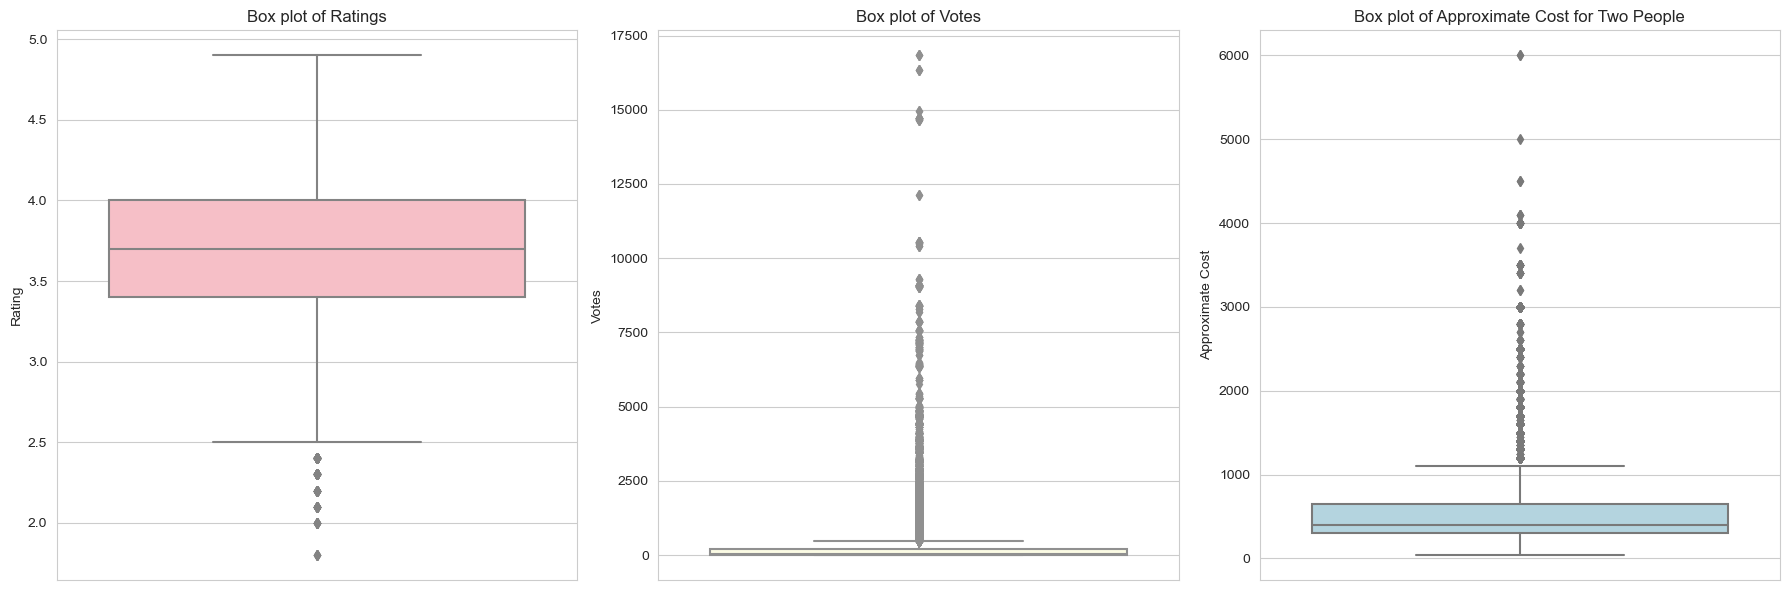

In [14]:
# Plotting box plots for 'rate', 'votes', and 'approx_cost(for two people)'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Box plot for 'rate'
sns.boxplot(y=zomato_df['rate'], ax=axes[0], color='lightpink')
axes[0].set_title('Box plot of Ratings')
axes[0].set_ylabel('Rating')

# Box plot for 'votes'
sns.boxplot(y=zomato_df['votes'], ax=axes[1], color='lightyellow')
axes[1].set_title('Box plot of Votes')
axes[1].set_ylabel('Votes')

# Box plot for 'approx_cost(for two people)'
sns.boxplot(y=zomato_df['approx_cost(for two people)'], ax=axes[2], color='lightblue')
axes[2].set_title('Box plot of Approximate Cost for Two People')
axes[2].set_ylabel('Approximate Cost')

plt.tight_layout()
plt.show()


## Feature Engineering:

### 1. **Number of Cuisines**

In [15]:
# Creating 'num_cuisines' feature
zomato_df['num_cuisines'] = zomato_df['cuisines'].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)

# Displaying the first few rows of the new feature
zomato_df[['cuisines', 'num_cuisines']].head()


,cuisines,num_cuisines
0,"North Indian, Mughlai, Chinese",3
1,"Chinese, North Indian, Thai",3
2,"Cafe, Mexican, Italian",3
3,"South Indian, North Indian",2
4,"North Indian, Rajasthani",2


### 2. Number of Dishes Liked

In [16]:
# Creating 'num_dishes_liked' feature
zomato_df['num_dishes_liked'] = zomato_df['dish_liked'].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)

# Displaying the first few rows of the new feature
zomato_df[['dish_liked', 'num_dishes_liked']].head()


,dish_liked,num_dishes_liked
0,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",7
1,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",7
2,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",7
3,Masala Dosa,1
4,"Panipuri, Gol Gappe",2


### 3. Price Range

In [17]:
# Defining the bins and labels for price range categorization
bins = [0, 300, 700, 1500, zomato_df['approx_cost(for two people)'].max() + 1]
labels = ['Low', 'Medium', 'High', 'Very High']

# Creating the 'price_range' feature
zomato_df['price_range'] = pd.cut(zomato_df['approx_cost(for two people)'], bins=bins, labels=labels, right=False)

# Displaying the first few rows of the new feature
zomato_df[['approx_cost(for two people)', 'price_range']].head()


,approx_cost(for two people),price_range
0,800.0,High
1,800.0,High
2,800.0,High
3,300.0,Medium
4,600.0,Medium


### 4. Length of Reviews

In [18]:
import numpy as np

# Computing the average review length again
zomato_df['avg_review_length'] = zomato_df['reviews_list'].str.findall(r'\'(.*?)\'').apply(lambda x: np.mean([len(review) for review in x]) if isinstance(x, list) and len(x) > 0 else 0)

# Displaying the first few rows of the new feature
zomato_df[['reviews_list', 'avg_review_length']].head()


,reviews_list,avg_review_length
0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",159.791667
1,"[('Rated 4.0', 'RATED\n Had been here for din...",141.160000
2,"[('Rated 3.0', ""RATED\n Ambience is not that ...",83.729730
3,"[('Rated 4.0', ""RATED\n Great food and proper...",107.800000
4,"[('Rated 4.0', 'RATED\n Very good restaurant ...",170.500000


### 5. Derived Location Features

In [19]:
# Identifying the top 5 locations
top_5_locations = zomato_df['location'].value_counts().head(5).index

# Creating the 'popular_area' feature
zomato_df['popular_area'] = zomato_df['location'].apply(lambda x: 1 if x in top_5_locations else 0)

# Displaying the first few rows of the new feature
zomato_df[['location', 'popular_area']].head()


,location,popular_area
0,Banashankari,0
1,Banashankari,0
2,Banashankari,0
3,Banashankari,0
4,Basavanagudi,0


## ______________________________________________________________________________

# Advanced Data Visualization with D3.js

Here we do preprocessing and Initial Library imports

In [20]:
# Displaying data types for each column
column_data_types = zomato_df.dtypes

# Checking for missing values in the dataset
missing_values = zomato_df.isnull().sum()

column_data_types, missing_values


(url                              object
 address                          object
 name                             object
 online_order                       bool
 book_table                         bool
 rate                            float64
 votes                             int64
 phone                            object
 location                         object
 rest_type                        object
 dish_liked                       object
 cuisines                         object
 approx_cost(for two people)     float64
 reviews_list                     object
 menu_item                        object
 listed_in(type)                  object
 listed_in(city)                  object
 num_cuisines                      int64
 num_dishes_liked                  int64
 price_range                    category
 avg_review_length               float64
 popular_area                      int64
 dtype: object,
 url                                0
 address                            0
 name 

## Import Libraries

In [21]:
#Library imports
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
init_notebook_mode(connected=True)

import numpy as np
import pandas as pd
import os
import json  ,IPython
from IPython.core.display import display, HTML, Javascript
#print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\patil\AppData\Local\Temp\ipykernel_27416\2530551491.py:13: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



## Preview Data

In [22]:
#Read data
restaurants = pd.read_csv('zomato.csv')

restaurants.transpose()

,0,1,2,3,4,5,6,7,8,9,...,51707,51708,51709,51710,51711,51712,51713,51714,51715,51716
url,https://www.zomato.com/bangalore/jalsa-banasha...,https://www.zomato.com/bangalore/spice-elephan...,https://www.zomato.com/SanchurroBangalore?cont...,https://www.zomato.com/bangalore/addhuri-udupi...,https://www.zomato.com/bangalore/grand-village...,https://www.zomato.com/bangalore/timepass-dinn...,https://www.zomato.com/bangalore/rosewood-inte...,https://www.zomato.com/bangalore/onesta-banash...,https://www.zomato.com/bangalore/penthouse-caf...,https://www.zomato.com/bangalore/smacznego-ban...,...,https://www.zomato.com/bangalore/m-bar-bengalu...,https://www.zomato.com/bangalore/keys-cafe-key...,https://www.zomato.com/bangalore/the-farm-hous...,https://www.zomato.com/bangalore/topsy-turvey-...,https://www.zomato.com/bangalore/bhagini-2-whi...,https://www.zomato.com/bangalore/best-brews-fo...,https://www.zomato.com/bangalore/vinod-bar-and...,https://www.zomato.com/bangalore/plunge-sherat...,https://www.zomato.com/bangalore/chime-sherato...,https://www.zomato.com/bangalore/the-nest-the-...
address,"942, 21st Main Road, 2nd Stage, Banashankari, ...","2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...","1112, Next to KIMS Medical College, 17th Cross...","1st Floor, Annakuteera, 3rd Stage, Banashankar...","10, 3rd Floor, Lakshmi Associates, Gandhi Baza...","37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...","19/1, New Timberyard Layout, Beside Satellite ...","2469, 3rd Floor, 24th Cross, Opposite BDA Comp...","1, 30th Main Road, 3rd Stage, Banashankari, Ba...","2470, 21 Main Road, 25th Cross, Banashankari, ...",...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...","Keys Hotel, 6, 1st Phase Industrial Area, Near...","136, SAP Labs India, KIADB Export Promotion In...","2E2, 4th Cross Road, Devasandra Industrial Est...","139/C1, Next To GR Tech Park, Pattandur Agraha...","Four Points by Sheraton Bengaluru, 43/3, White...","Number 10, Garudachar Palya, Mahadevapura, Whi...",Sheraton Grand Bengaluru Whitefield Hotel & Co...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,"ITPL Main Road, KIADB Export Promotion Industr..."
name,Jalsa,Spice Elephant,San Churro Cafe,Addhuri Udupi Bhojana,Grand Village,Timepass Dinner,Rosewood International Hotel - Bar & Restaurant,Onesta,Penthouse Cafe,Smacznego,...,M Bar - Bengaluru Marriott Hotel Whitefield,Keys Cafe - Keys Hotel,The Farm House Bar n Grill,Topsy Turvey,Bhagini,Best Brews - Four Points by Sheraton Bengaluru...,Vinod Bar And Restaurant,Plunge - Sheraton Grand Bengaluru Whitefield H...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,The Nest - The Den Bengaluru
online_order,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,...,No,No,No,No,No,No,No,No,No,No
book_table,Yes,No,No,No,No,No,No,Yes,No,No,...,No,No,No,No,No,No,No,No,Yes,No
rate,4.1/5,4.1/5,3.8/5,3.7/5,3.8/5,3.8/5,3.6/5,4.6/5,4.0/5,4.2/5,...,3.9 /5,2.8 /5,3.7 /5,NaN,2.5 /5,3.6 /5,NaN,NaN,4.3 /5,3.4 /5
votes,775,787,918,88,166,286,8,2556,324,504,...,77,161,34,0,81,27,0,0,236,13
phone,080 42297555\r\n+91 9743772233,080 41714161,+91 9663487993,+91 9620009302,+91 8026612447\r\n+91 9901210005,+91 9980040002\r\n+91 9980063005,+91 9731716688\r\n080 26740366,080 48653961\r\n080 48655715,+91 8884135549\r\n+91 9449449316,+91 9945230807\r\n+91 9743804471,...,080 49435000,080 39451000\n+91 8884038484,+91 9980121279\n+91 9900240646,+91 9148155994,080 65951222,080 40301477,+91 8197675843,NaN,080 49652769,+91 8071117272
location,Banashankari,Banashankari,Banashankari,Banashankari,Basavanagudi,Basavanagudi,Mysore Road,Banashankari,Banashankari,Banashankari,...,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,Whitefield,"ITPL Main Road, Whitefield","ITPL Main Road, Whitefield"
rest_type,Casual Dining,Casual Dining,"Cafe, Casual Dining",Quick Bites,Casual Dining,Casual Dining,Casual Dining,"Casual Dining, Cafe",Cafe,Cafe,...,"Fine Dining, Bar","Casual Dining, Bar","Casual Dining, Bar",Bar,"Casual Dining, Bar",Bar,Bar,Bar,Bar,"Bar, Casual Din

In [23]:
print('There are '+ str(len(restaurants['name'].unique()))+ ' restaurants, listed in ' +str(len(restaurants['location'].unique())) + ' different locations.')

There are 8792 restaurants, listed in 94 different locations.


## Missing Values

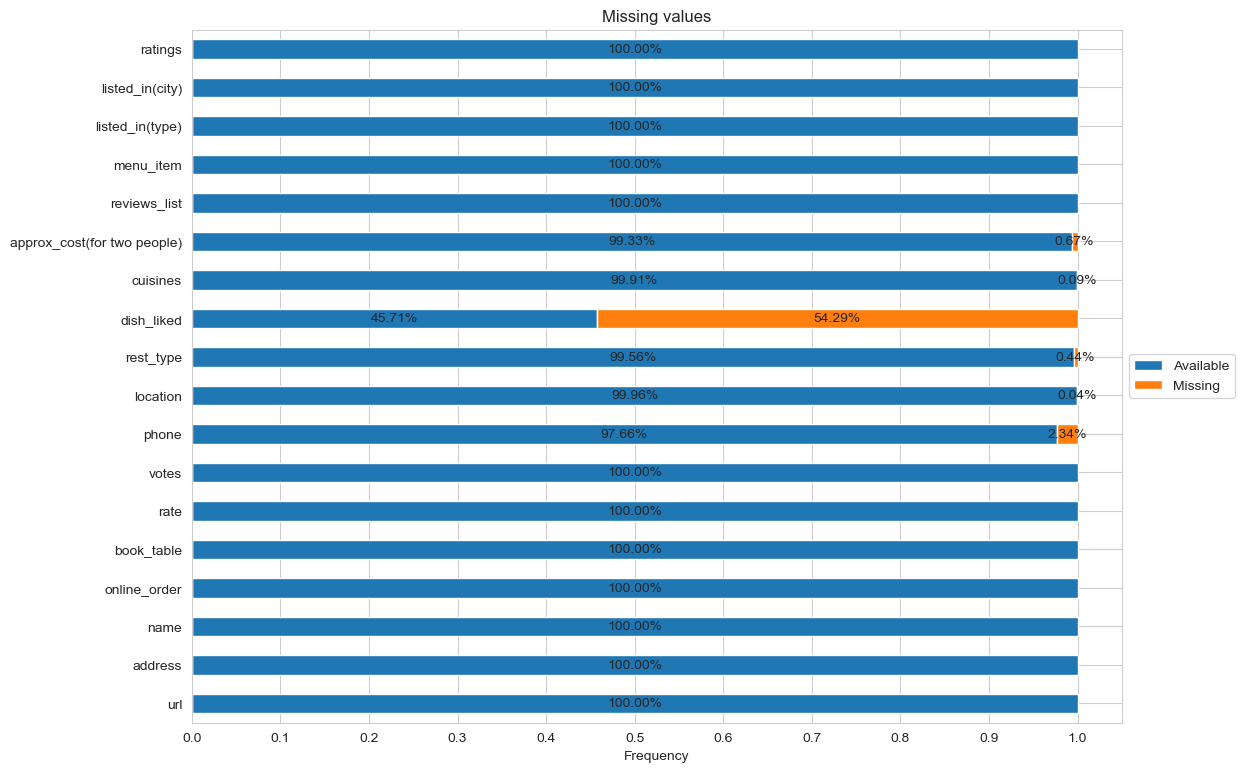

In [24]:
#Add ratings column
restaurants['rate'].fillna('-1/5', inplace= True)
restaurants['ratings'] = restaurants['rate'].apply(lambda x : -2 if (x=='NEW' or x=='-') else float(x.split('/')[0]))
#restaurants['ratings'].unique()

temp = restaurants.fillna('Missing')
temp = temp.applymap(lambda x: x if x == 'Missing' else 'Available')
figsize_width = 12
figsize_height = len(temp.columns)*0.5
plt_data = pd.DataFrame()
for col in temp.columns:
    temp_col = temp.groupby(col).size()/len(temp.index)
    temp_col = pd.DataFrame({col:temp_col})
    plt_data = pd.concat([plt_data, temp_col], axis=1)

ax = plt_data.T.plot(kind='barh', stacked=True, figsize=(figsize_width, figsize_height))

# Annotations
labels = []
for i in plt_data.index:
    for j in plt_data.columns:
        label = '{:.2%}'.format(plt_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')

plt.xlabel('Frequency')
plt.title('Missing values')
plt.xticks(np.arange(0, 1.05, 0.1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## *1. Bubble Plot(Circle Packing)* 
Let's visualize the locations with most active number of zomato users and the respective top 10 serving restaurants. Size of the bubble represents the vote count the restaurant has on zomato. Clicking on the bubble will show the top restaurants based on the ratings

In [25]:
def getTopNRestsWithVotesCount(restaurants, location, n=10):
    temp_rest = restaurants[restaurants['location']==location][['name','votes','ratings',
                                                                'approx_cost(for two people)']].groupby(['name',
                                                                                                         'approx_cost(for two people)']).agg({'votes': np.sum,'ratings': np.mean}).reset_index()
    #temp_rest = temp_rest.groupby(['name','votes']).size().reset_index(name='Freq').sort_values('votes',ascending = False)
    temp_rest = temp_rest.sort_values('ratings',ascending = False).head(n)
    return temp_rest.round({'ratings': 2})

def getLocationWiseActiveRestaurants(restaurants, locationCount=10, restaurantsCount=10):
    temp_votes = restaurants.groupby(['location'])['votes'].sum().reset_index().sort_values('votes', ascending=False).head(locationCount)
    result = pd.DataFrame()
    for index,row in temp_votes.iterrows():
        df = getTopNRestsWithVotesCount(restaurants, row['location'], restaurantsCount)
        df['location'] = row['location']
        df['location_votes'] = row['votes']
        result = result.append(df)
    return result

def getChildrenNodes(df, size='', title='1', level=0):
    resultList = []
    result = {}
    result['name'] = str(title)
    result['size'] = size
    result['level'] = level
    children = df[df['name']==title][['children','size']].values
    if len(children)>0:
        for child,sz in children:
            resultList.append(getChildrenNodes(df, sz, child,level+1))
        result['children'] = resultList
    else:
        return result
    return result

def createDataForBubblePlot(df):
    temp_rests = df.groupby(['location','location_votes']).size().reset_index(name='Freq')
    result = df
    temp_df = pd.DataFrame(columns = ['name','votes','ratings','location','location_votes'])
    for index,row in temp_rests.iterrows():
        temp_df.loc[0]=[row['location'],row['location_votes'],'0','1','0']
        result = result.append(temp_df)
    result['children'],result['name'],result['size'] = result['name'],result['location'],result['votes']
    #getChildrenNodes(result)
    with open('output.json', 'w') as outfile:
        json.dump(getChildrenNodes(result), outfile)
    return result

In [27]:
htmllocationbubble = """<!DOCTYPE html><meta charset="utf-8"><style>.node {cursor: pointer;}.node:hover {stroke: #000;stroke-width: 1.5px;}.node--leaf {fill: white;}
.label {font: 11px "Helvetica Neue", Helvetica, Arial, sans-serif;text-anchor: middle;text-shadow: 0 1px 0 #fff, 1px 0 0 #fff, -1px 0 0 #fff, 0 -1px 0 #fff;}
.label,.node--root,.node--leaf {pointer-events: none;}</style><svg id="two" width="760" height="760"></svg>
"""
js_locationbubble="""
require.config({
        paths: {
            d3: "https://d3js.org/d3.v4.min"
         }
     });
require(["d3"], function(d3) {
var svg = d3.select("#two"),
    margin = 20,
    diameter = +svg.attr("width"),
    g = svg.append("g").attr("transform", "translate(" + diameter / 2 + "," + diameter / 2 + ")"),
    color = d3.scaleSequential(d3.interpolateViridis).domain([-2, 2]),
    pack = d3.pack().size([diameter - margin, diameter - margin]).padding(2);
d3.json("output.json", function(t, n) {
if (t) throw t;
var r, e = n = d3.hierarchy(n).sum(function(t) {
        return t.size
    }).sort(function(t, n) {
        return n.value - t.value
    }),
    a = pack(n).descendants(),
    i = g.selectAll("circle").data(a).enter().append("circle").attr("class", function(t) {
        return t.parent ? t.children ? "node" : "node node--leaf" : "node node--root"
    }).style("fill", function(t) {
        return t.children ? color(t.depth) : null
    }).on("click", function(t) {
        e !== t && (l(t), d3.event.stopPropagation())
    }),
    o = (g.selectAll("text").data(a).enter().append("text").attr("class", "label").style("fill-opacity", function(t) {
        return t.parent === n ? 1 : 0
    }).style("display", function(t) {
        return t.parent === n ? "inline" : "none"
    }).text(function(t) {
        return t.data.name + ": " + t.data.size
    }), g.selectAll("circle,text"));

function l(t) {
    e = t, d3.transition().duration(d3.event.altKey ? 7500 : 750).tween("zoom", function(t) {
        var n = d3.interpolateZoom(r, [e.x, e.y, 2 * e.r + margin]);
        return function(t) {
            c(n(t))
        }
    }).selectAll("text").filter(function(t) {
        return t.parent === e || "inline" === this.style.display
    }).style("fill-opacity", function(t) {
        return t.parent === e ? 1 : 0
    }).on("start", function(t) {
        t.parent === e && (this.style.display = "inline")
    }).on("end", function(t) {
        t.parent !== e && (this.style.display = "none")
    })
}

function c(n) {
    var e = diameter / n[2];
    r = n, o.attr("transform", function(t) {
        return "translate(" + (t.x - n[0]) * e + "," + (t.y - n[1]) * e + ")"
    }), i.attr("r", function(t) {
        return t.r * e
    })
}
svg.style("background", color(-1)).on("click", function() {
    l(n)
}), c([n.x, n.y, 2 * n.r + margin])
});
});"""

In [28]:
locationWiseActiveRestaurants = getLocationWiseActiveRestaurants(restaurants)
createDataForBubblePlot(locationWiseActiveRestaurants)

h = display(HTML(htmllocationbubble))
display(HTML('''<h3>Graph is interactive. Click on the circles for more info.</h3>'''))
j = IPython.display.Javascript(js_locationbubble)
IPython.display.display_javascript(j)

## 2. Forced Directed Network

The graph will give you the top restaurants serving that dish in top 5 most voted locations. Size of the node(circle) represents the vote count for the restaurant.

In [29]:
def getTopRestaurantsForDish(data, dishname='Pasta', n=10):
    dishData = data[data['dish_liked']==dishname]
    dishData = dishData.groupby(['name','location','dish_liked','ratings']).agg({'votes': np.mean})
    dishData = dishData.sort_values(['votes'], ascending=False).sort_values(['ratings'], ascending=False).reset_index()
    dishData['index'] = dishData.index
    dishData['Rank'] = dishData.groupby('location')['index'].rank(ascending=True)
    return dishData.loc[dishData['Rank']<=n]

def getTopRestaurantsFromTopLocations(data, n=10):
    restData = data.groupby(['location'])['votes'].sum().reset_index()
    restData = restData.sort_values('votes', ascending=False)
    restData = restData.head(n)
    return data[data['location'].isin(restData['location'].values)]

def createDishGraph(dishName, data):
    nodes = []
    links = []
    nodes.append({"id": 'Dish: '+dishName, "group": 0, "size": 15})
    tempLocations = data.groupby('location')['votes'].sum().reset_index()
    tempLocations['perc'] = tempLocations['votes']*100/tempLocations['votes'].sum()
    for index,row in tempLocations.iterrows():
        nodes.append({"id": 'Location: '+row['location'], "group": index+1, "size": int(round(row['perc'],0))})
        links.append({"source": 'Dish: '+dishName, "target": 'Location: '+row['location'], "value": 1})
        tempRests = data[data['location']==row['location']]
        tempRests['perc'] = tempRests['votes']*100/tempRests['votes'].sum()
        for ind,rr in tempRests.iterrows():
            nodes.append({"id": row['location']+'- Restaurant: '+rr['name']+'. Rated: '+str(rr['ratings']), "group": index+1, "size": int(round(rr['perc'],0))})
            links.append({"source": 'Location: '+row['location'], "target": row['location']+'- Restaurant: '+rr['name']+'. Rated: '+str(rr['ratings']), "value": 1})
    doc = {'nodes' : nodes, 'links' : links}
    with open('dishGraph.json', 'w') as outfile:
        json.dump(doc, outfile)

In [30]:
htmlDishGraph = """<!DOCTYPE html>
<meta charset="utf-8">
<style>

.links line {
  stroke: #999;
  stroke-opacity: 0.8;
}
.node text {
  pointer-events: none;
  font: 10px sans-serif;
}

.tooldiv {
    display: inline-block;
    width: 120px;
    background-color: white;
    color: #000;
    text-align: center;
    padding: 5px 0;
    border-radius: 6px;
    z-index: 1;
}
.nodes circle {
  stroke: #fff;
  stroke-width: 1.5px;
}

div.tooltip {
    position: absolute;
    text-align: center;
    width: 100px;
    height: 65px;
    padding: 2px;
    font: 12px sans-serif;
    background: lightsteelblue;
    border: 0px;
    border-radius: 8px;
    pointer-events: none;
}

</style>
<svg id="dg" width="760" height="760"></svg>"""

jsDishGraph = """require.config({
    paths: {
        d3: "https://d3js.org/d3.v4.min"
     }
 });

 require(["d3"], function(d3) {
var svg = d3.select("#dg"),
    width = +svg.attr("width"),
    height = +svg.attr("height");

var color = d3.scaleOrdinal(d3.schemeCategory20);

var simulation = d3.forceSimulation()
    // fix the link distance, charge and the center layout
    .force("link", d3.forceLink().id(function(d) { return d.id; }).distance(120).strength(1))
    .force("charge", d3.forceManyBody().strength(-155))
    .force("center", d3.forceCenter(width / 2, height / 2));

d3.json("dishGraph.json", function(error, graph) {
  if (error) throw error;

  var link = svg.append("g")
      .attr("class", "links")
    .selectAll("line")
    .data(graph.links)
    .enter().append("line")
      .attr("stroke-width", function(d) { return Math.sqrt(d.value); });

// Define the div for the tooltip
var div = d3.select("body").append("div")
    .attr("class", "tooltip")
    .style("opacity", 0);

  var node = svg.append("g")
      .attr("class", "nodes")
    .selectAll("circle")
    .data(graph.nodes)
    .enter().append("circle")
      .attr("r", function(d) {return d.size})
      .attr("fill", function(d) { return color(d.group); })
      .call(d3.drag()
          .on("start", dragstarted)
          .on("drag", dragged)
          .on("end", dragended)).on("mouseover", function(d) {
            div.transition()
                .duration(200)
                .style("opacity", .9);
            div.html(d.id )
                .style("left", (d3.event.pageX) + "px")
                .style("top", (d3.event.pageY - 28) + "px");
            })
        .on("mouseout", function(d) {
            div.transition()
                .duration(500)
                .style("opacity", 0);
        });


  //node.append("title")
   // .text(function(d) { return d.id; });

  simulation
      .nodes(graph.nodes)
      .on("tick", ticked);


  simulation.force("link")
      .links(graph.links);

  function ticked() {
    link
        .attr("x1", function(d) { return d.source.x; })
        .attr("y1", function(d) { return d.source.y; })
        .attr("x2", function(d) { return d.target.x; })
        .attr("y2", function(d) { return d.target.y; });

    node
        .attr("cx", function(d) { return d.x; })
        .attr("cy", function(d) { return d.y; });
  }
});

function dragstarted(d) {
  if (!d3.event.active) simulation.alphaTarget(0.3).restart();
  d.fx = d.x;
  d.fy = d.y;
}

function dragged(d) {
  d.fx = d3.event.x;
  d.fy = d3.event.y;
}

function dragended(d) {
  if (!d3.event.active) simulation.alphaTarget(0);
  d.fx = null;
  d.fy = null;
}
 });
"""

temp = restaurants.groupby(['name','location','dish_liked','ratings']).agg({'votes': np.mean}).reset_index()
s = temp["dish_liked"].str.split(',', expand=True).stack()
i = s.index.get_level_values(0)
temp = temp.loc[i].copy()
temp["dish_liked"] = s.values
temp['dish_liked'] = temp['dish_liked'].apply(lambda x: x.strip())

dfTemp = getTopRestaurantsForDish(temp)
dfTemp = getTopRestaurantsFromTopLocations(dfTemp,5)

In [31]:
createDishGraph('Pizza', dfTemp)
h = display(HTML(htmlDishGraph))
j = IPython.display.Javascript(jsDishGraph)
IPython.display.display_javascript(j)

## *3. Scatter Plot*

Let's visualise location wise top rated restaurants. Graph is interactive, hovering on nodes will show more details. Clicking on legend will filter the data in the graph. Size of the bubble represents the vote count for the restaurant.

In [32]:
temp = getLocationWiseActiveRestaurants(restaurants, 5, 20).reset_index()
#temp.head()

colors = ['blue', 'orange', 'green', 'red', 'purple']

opt = []
opts = []
for i in range(0, len(colors)):
    opt = dict(
        target = temp['location'][[i]].unique(), value = dict(marker = dict(color = colors[i]))
    )
    opts.append(opt)

data = [dict(
  type = 'scatter',
  mode = 'markers',
  x = temp['approx_cost(for two people)'],
  y = temp['ratings'],
  text = temp['name'],
  hoverinfo = 'text',
  opacity = 0.8,
  marker = dict(
      size = temp['votes'],
      sizemode = 'area',
      sizeref = 100
  ),
  transforms = [
      dict(
        type = 'groupby',
        groups = temp['location'],
        styles = opts
    )]
)]

layout = dict(
    title = '<b>Location wise top rated restaurants</b>',
    yaxis = dict(
        title='Ratings'
        #type = 'log'
    ),
    xaxis = dict(
        title='Approx cost for two people'
    )
)


iplot({'data': data, 'layout': layout}, validate=False)

## *4.Top served cuisines in Bangalore*

In [34]:
def group_lower_ranking_values(pie_raw, column):
    """Converts pie_raw dataframe with multiple categories to a dataframe with fewer categories

    Calculate the 85th quantile and group the lesser values together.
    Lesser values will be labelled as 'Other'

    Parameters
    ----------
    pie_raw : DataFrame
        dataframe with the data to be aggregated
    column : str
        name of the column based on which dataframe values will be aggregated
    """
    pie_counts = pie_raw.groupby(column).agg('count')
    pct_value = pie_counts[lambda df: df.columns[0]].quantile(.85)
    values_below_pct_value = pie_counts[lambda df: df.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row
    pie_grouped = pie_raw.apply(fix_values, axis=1).groupby(column).agg('count')
    return pie_grouped

temp = restaurants.groupby(['name','cuisines']).size().reset_index(name='Freq')
s = temp["cuisines"].str.split(',', expand=True).stack()
i = s.index.get_level_values(0)
temp = temp.loc[i].copy()
temp["cuisines"] = s.values
temp['cuisines'] = temp['cuisines'].apply(lambda x: x.strip())
temp = group_lower_ranking_values(temp, 'cuisines').sort_values('name', ascending=False)
temp.drop('Other', inplace=True)

trace = go.Bar(
            y=temp['name'],
            x=temp.index
    )
data = [trace]
layout = go.Layout(xaxis=dict(tickangle=-45),
                   yaxis = dict(title='Number of restaurants'),
    title='Most popular cuisines in Bangalore',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='cuisine-bangalore')

## 5. Multi-axis scatter with dropdown control
Let's visualise top served cuisines of Bangalore. Using the above graph, it can be concluded that North India, Chinese, South Indian and Fast Food are top four cuisines that are served in Bangalore.
Dropdown will give the ability to select the cuisine according to which the data in the graph will be displayed.

In [36]:
def getCuisineTopRestaurants(data, cuisine, n=10):
    temp = data[data['cuisines']==cuisine]
    temp = temp.groupby(['name','cuisines']).agg({'ratings': np.mean, 'votes': np.mean}).reset_index()
    temp = temp.sort_values('ratings', ascending=False)
    temp = temp.sort_values('votes', ascending=False)
    return temp.round({'votes':0}).head(n)

temp = restaurants.groupby(['name','cuisines','ratings']).agg({'votes': np.mean}).reset_index()
s = temp["cuisines"].str.split(',', expand=True).stack()
i = s.index.get_level_values(0)
temp = temp.loc[i].copy()
temp["cuisines"] = s.values
temp['cuisines'] = temp['cuisines'].apply(lambda x: x.strip())

interestCuisines = ['North Indian', 'Chinese', 'South Indian', 'Fast Food']
north_df = getCuisineTopRestaurants(temp, 'North Indian')
chinese_df = getCuisineTopRestaurants(temp, 'Chinese')
south_df = getCuisineTopRestaurants(temp, 'South Indian')
fast_df = getCuisineTopRestaurants(temp, 'Fast Food')

In [37]:
trace_north = go.Scatter(x=list(north_df['name']),
                        y=list(north_df['votes']),
                         name='votes',
                        line=dict(color='#33CFA5'))

trace_north_rate = go.Scatter(x=list(north_df['name']),
                        y=list(north_df['ratings']),
                        yaxis='y2',
                        name='rated',
                        line=dict(color='#ff7f0e'))

trace_chinese = go.Scatter(x=list(chinese_df['name']),
                            y=list(chinese_df['votes']),
                           visible=False,
                            name='votes',
                            line=dict(color='#33CFA5'))

trace_chinese_rate = go.Scatter(x=list(chinese_df['name']),
                            y=list(chinese_df['ratings']),
                            yaxis='y2',
                           visible=False,
                            name='rated',
                            line=dict(color='#ff7f0e'))

trace_south = go.Scatter(x=list(south_df['name']),
                       y=list(south_df['votes']),
                       name='votes',
                         visible=False,
                       line=dict(color='#33CFA5'))

trace_south_rate = go.Scatter(x=list(south_df['name']),
                       y=list(south_df['ratings']),
                        yaxis='y2',
                       name='rated',
                         visible=False,
                       line=dict(color='#ff7f0e'))

trace_fast = go.Scatter(x=list(fast_df['name']),
                           y=list(fast_df['votes']),
                           name='votes',
                        visible=False,
                           line=dict(color='#33CFA5'))

trace_fast_rate = go.Scatter(x=list(fast_df['name']),
                           y=list(fast_df['ratings']),
                            yaxis='y2',
                           name='rated',
                        visible=False,
                           line=dict(color='#ff7f0e'))

data = [trace_north, trace_chinese, trace_south, trace_fast, 
        trace_north_rate, trace_chinese_rate, trace_south_rate, trace_fast_rate]

updatemenus = list([
    dict(active=0,
         buttons=list([   
            dict(label = 'North Indian',
                 method = 'update',
                 args = [{'visible': [True, False, False, False, True, False, False, False]},
                         {'title': 'North Indian'}]),
            dict(label = 'Chinese',
                 method = 'update',
                 args = [{'visible': [False, True, False, False, False, True, False, False]},
                         {'title': 'Chinese'}]),
            dict(label = 'South Indian',
                 method = 'update',
                 args = [{'visible': [False, False, True, False, False, False, True, False]},
                         {'title': 'South Indian'}]),
            dict(label = 'Fast Food',
                 method = 'update',
                 args = [{'visible': [False, False, False, True, False, False, False, True]},
                         {'title': 'Fast Food'}])
        ]),
    )
])

layout = dict(title='<b>Top cuisine serving restaurants.</b>', showlegend=False,
              yaxis=dict(title='Votes'),
              xaxis=dict(title='Restaurants'),
              yaxis2=dict(title='Ratings',             
                overlaying='y',
                side='right'),
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
iplot(fig, filename='update_dropdown')